# **YES BANK STOCK CLOSING PREDICTION**











> **PROJECT TYPE- REGRESSION**

> **CONTRIBUTION- TEAM**

1.   **NEHA JADHAV**
2.   **AKANKSHA JADHAV**

# **PROJECT SUMMARY**

**Stock Price Prediction**-
Predicting the stock market has been the bane and goal of investors since its inception. Every day billions of dollars are traded on the stock exchange, and behind every dollar is an investor hoping to make a profit in one way or another.

Entire companies rise and fall daily depending on market behaviour. If an investor is able to accurately predict market movements, he offers a tantalizing promise of wealth and influence. 
Today, so many people are making money staying at home trading in the stock market. It is a plus point for you if you use your experience in the stock market and your machine learning skills for the task of stock price prediction.

Let’s see how to predict stock prices using Machine Learning and the python programming language.

# **GITHUB LINK-**

https://github.com/nehaa54/StockClosingPricePred.git

# **PROBLEM STATEMENT**

**Problem Statement-Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in the news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest, and lowest stock prices of every month. The main objective is to predict the stock’s closing price of the month.**

**What is stock?**

A Stock or share (also known as a company’s 'equity') is a financial instrument that represents ownership in a company. Units of stock are called "shares." Stocks are bought and sold predominantly on stock exchanges, though there can be private sales as well, and are the foundation of many individual investors' portfolios.

Since, we've the YES BANK Stock price dataset which has the monthly stock prices. It contains the following features:

**Open** - The opening price is the price at which a security first trades upon the opening of an exchange on a trading day i.e. buyers and sellers meet to make deals with the highest bidder, the opening price may not have to be the same as the last day's closing price.

**High** - The high is the highest price at which a stock traded during a period.

**Low** -The low is the highest price at which a stock traded during a period.

**Close** -The closing price is a stock's trading price at the end of a trading day. This makes it the most recent price of a stock until the next trading session. The closing price is calculated as the weighted average price of the last 30 minutes, i.e. from 3:00 PM to 3:30 PM in case of equity.

In [1]:
#importing the libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# **Importing and loading the data**

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#Using pandas and "read_csv" function to read the yesbank_stockprices csv fie
dataset= pd.read_csv('/content/drive/MyDrive/Capstone project-02/data_YesBank_StockPrices.csv')

# **DATA EXPLORATION**

In [5]:
#Getting the first 10 rows of dataset
dataset.head(10)

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41
5,Dec-05,13.49,14.44,13.00,13.71
6,Jan-06,13.68,17.16,13.58,15.33
7,Feb-06,15.50,16.97,15.40,16.12
8,Mar-06,16.20,20.95,16.02,20.08
9,Apr-06,20.56,20.80,18.02,19.49


In [6]:
#checking the last 10 rows of the dataset
dataset.tail(10)

,Date,Open,High,Low,Close
175,Feb-20,39.10,40.70,33.60,34.55
176,Mar-20,35.20,87.95,5.55,22.45
177,Apr-20,22.30,30.45,20.30,27.95
178,May-20,27.80,31.60,25.20,26.85
179,Jun-20,27.75,31.95,25.55,25.60
180,Jul-20,25.60,28.30,11.10,11.95
181,Aug-20,12.00,17.16,11.85,14.37
182,Sep-20,14.30,15.34,12.75,13.15
183,Oct-20,13.30,14.01,12.11,12.42
184,Nov-20,12.41,14.90,12.21,14.67


In [8]:
#checking the information of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


In [9]:
#checking the No. of rows and No. of columns of the dataset
dataset.shape

(185, 5)

In [10]:
#columns containing numerical values
numerical_col = dataset.describe().columns
numerical_col

Index(['Open', 'High', 'Low', 'Close'], dtype='object')

In [11]:
#This will return the date column as type DateTime from object type
from datetime import datetime
dataset['Date'] = pd.to_datetime(dataset['Date'].apply(lambda x: datetime.strptime(x,'%b-%y')))

In [12]:
#Rechecking the date column
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    185 non-null    datetime64[ns]
 1   Open    185 non-null    float64       
 2   High    185 non-null    float64       
 3   Low     185 non-null    float64       
 4   Close   185 non-null    float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 7.4 KB


In [13]:
#description of the data in DataFrame
dataset.describe()

,Open,High,Low,Close
count,185.000000,185.000000,185.000000,185.000000
mean,105.541405,116.104324,94.947838,105.204703
std,98.879850,106.333497,91.219415,98.583153
min,10.000000,11.240000,5.550000,9.980000
25%,33.800000,36.140000,28.510000,33.450000
50%,62.980000,72.550000,58.000000,62.540000
75%,153.000000,169.190000,138.350000,153.300000
max,369.950000,404.000000,345.500000,367.900000


# CHECKING FOR NULL VALUES AND DUPLICATES IN THE DATASET

In [ ]:
#Checking if any null value is present in the dataset
dataset.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

**After checking the information we can say that there are no null values in the dataset.**

In [ ]:
#Checking if duplicates are present
len(dataset[dataset.duplicated()])

0

# **CHECKING FOR OUTLIERS**

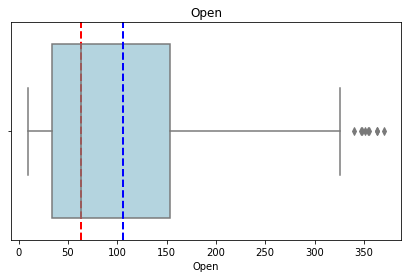

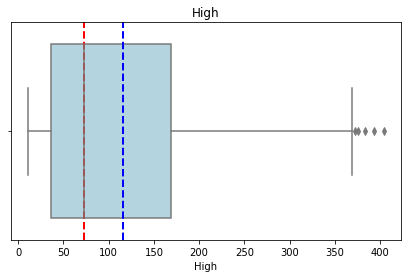

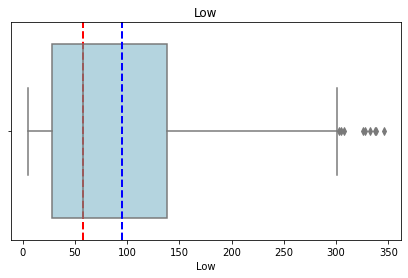

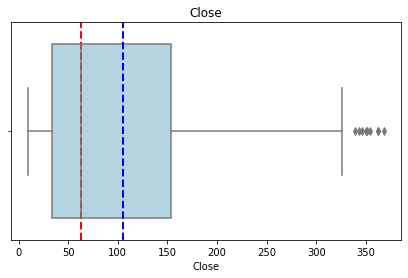

In [17]:
# Now craete a boxplot to check the outliers 
for i in numerical_col:
  fig = plt.figure(figsize=(7, 4))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  sns.boxplot(x=features ,color= 'lightblue')
  ax.axvline(features.mean(),color = 'blue',linestyle = 'dashed',linewidth = 2)
  ax.axvline(features.median(),color = 'red',linestyle = 'dashed',linewidth = 2)
  ax.set_title(i)
plt.show()



*   All the boxplot shows the presence of outliers and also gap between the mean and median lines and the median being on the left side shows that the columns are right skewed



# **EXOLORATORY DATA ANALYSIS**

**DATA DISTRIBUTION MEAN AND MEDIAN OF EACH INDEPENDENT VARIABLE**

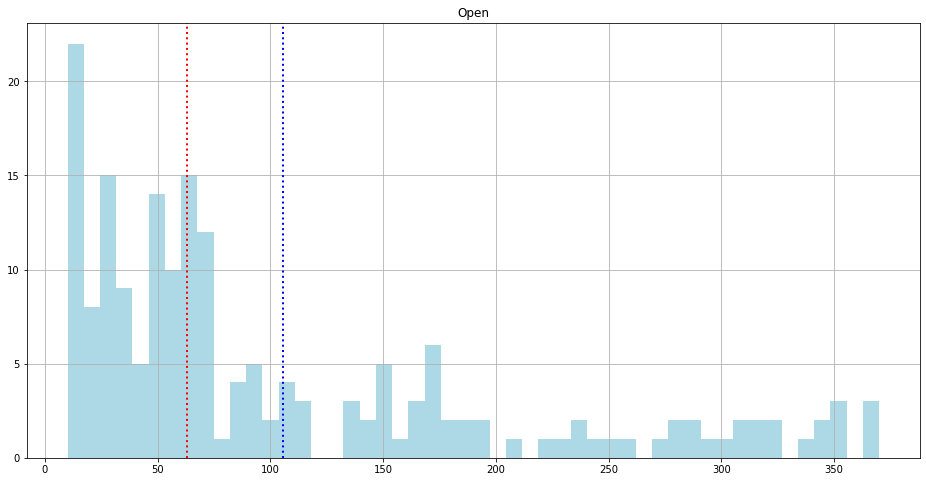

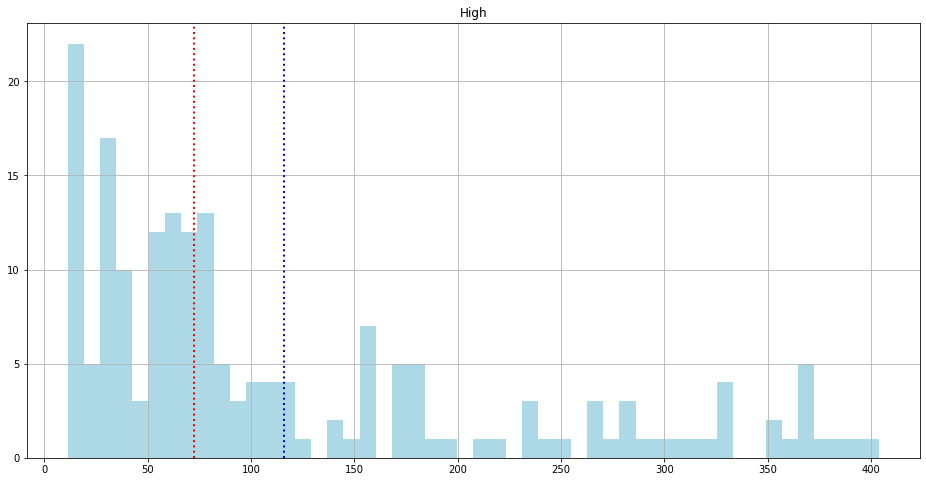

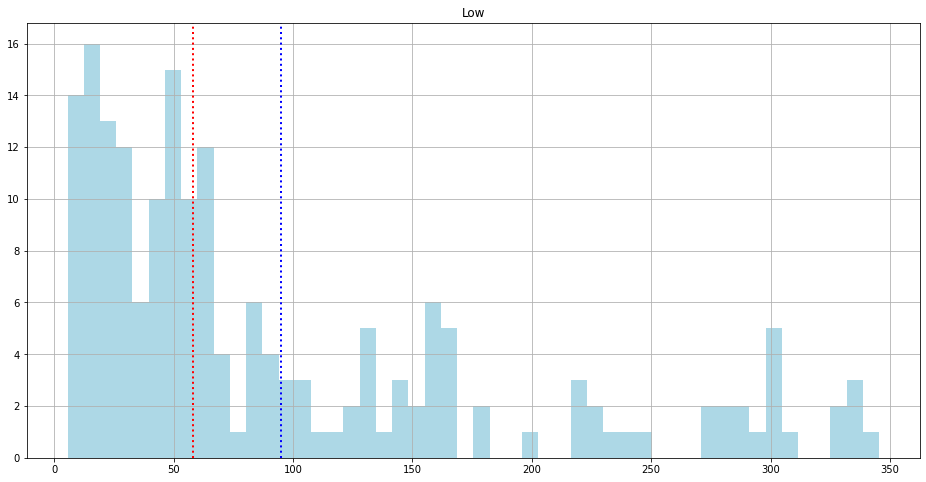

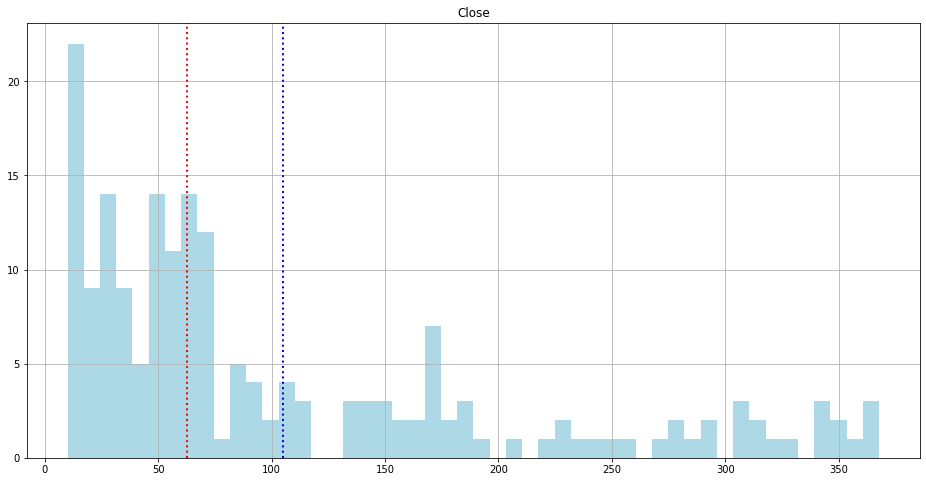

In [ ]:
#mean and median of each independent variable
for i in numerical_col[:]:
  fig = plt.figure(figsize=(16,8))
  ax = fig.gca()
  features = dataset[i]
  label = dataset['Close']
  features.hist(bins = 50,ax = ax,color = 'lightblue')
  ax.axvline(features.mean(),color = 'blue',linestyle = 'dotted',linewidth = 2)
  ax.axvline(features.median(),color = 'red',linestyle = 'dotted',linewidth = 2)
  ax.set_title(i)

**We can conclude that data is not normally distributed as mean is higher than median in all features. By using logarithmic transformation, we have to convert our columns into normal distribution dataset.**

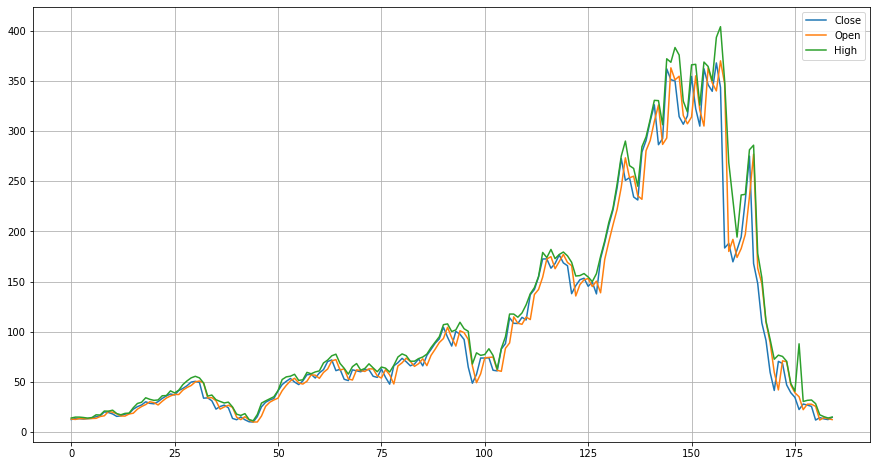

In [ ]:
#line plot for visializing 'Close','Open' and 'High' columns
plt.figure(figsize=(15,8))
plt.plot(dataset['Close'])
plt.plot(dataset['Open'])
plt.plot(dataset['High'])
plt.legend(['Close','Open','High'])
plt.grid()

**NORMALIZATION OF DEPENDENT VARIABLE**

**TO CORRECT THE SKEWNESS WE WILL DO LOG TRANSFORMATION.**

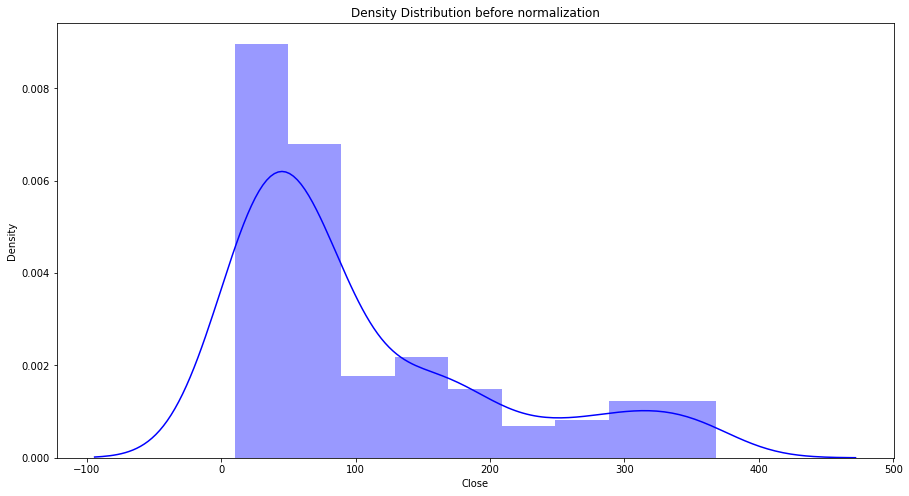

In [18]:
#density distribution plot for dependent variable 'Close' before normalization
plt.figure(figsize=(15,8))
plt.title('Density Distribution before normalization')
sns.distplot(dataset['Close'],color='blue')
plt.show()

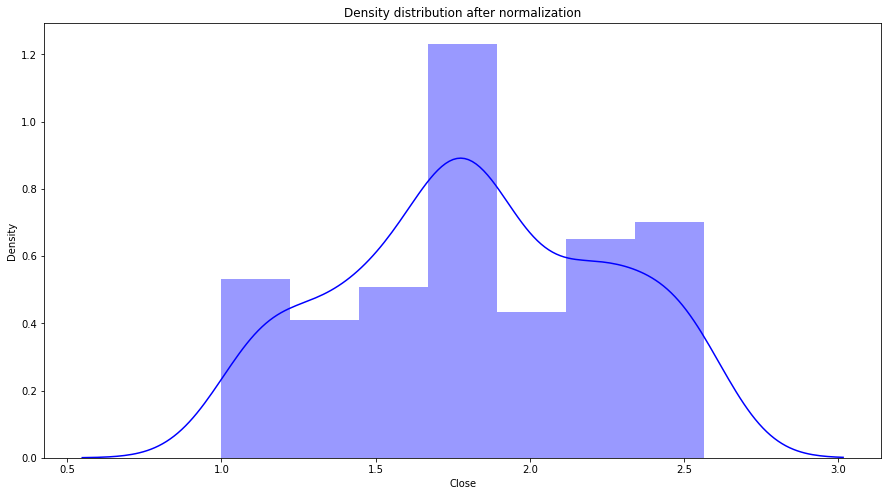

In [19]:
#Density distribution plot for dependent variable 'Close' after Log Transformation
plt.figure(figsize=(15,8))
plt.title('Density distribution after normalization')
sns.distplot(np.log10(dataset['Close']),color='blue')
plt.show()

**NORMALISATION FOR INDEPENDENT VARIABLES**

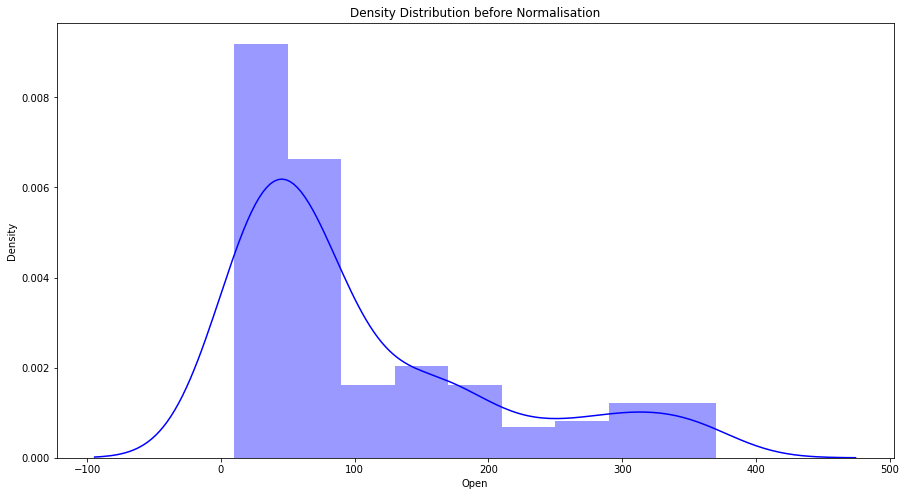

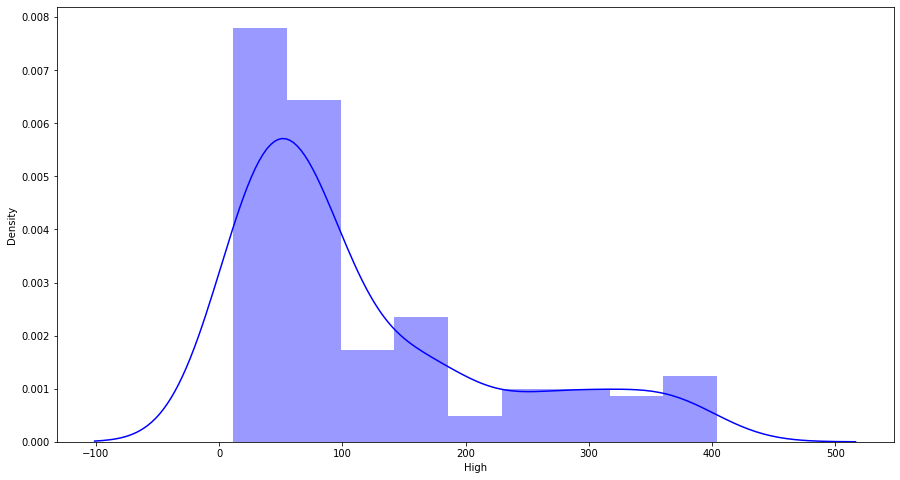

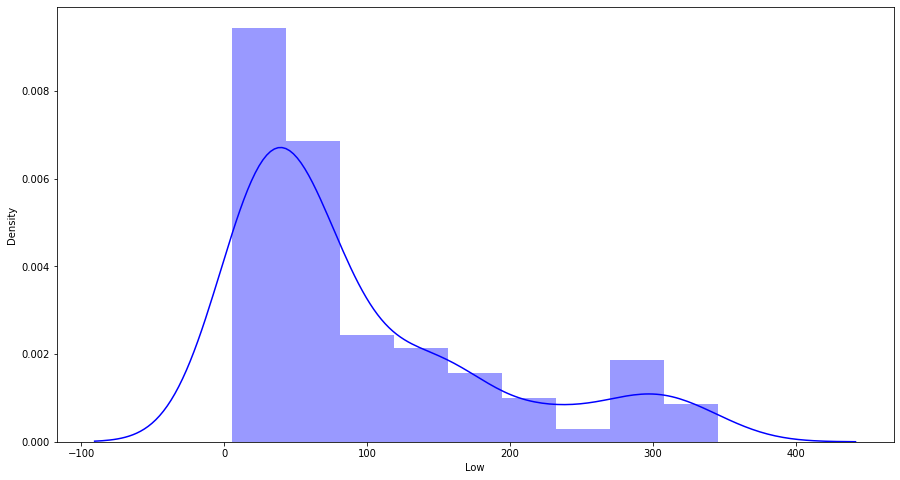

In [ ]:
#Density Distribution plot for Independent Variables before Normalisation
plt.figure(figsize=(15,8))
plt.title('Density Distribution before Normalisation')
sns.distplot(dataset['Open'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['High'], color='blue')

plt.figure(figsize=(15,8))
sns.distplot(dataset['Low'], color='blue')

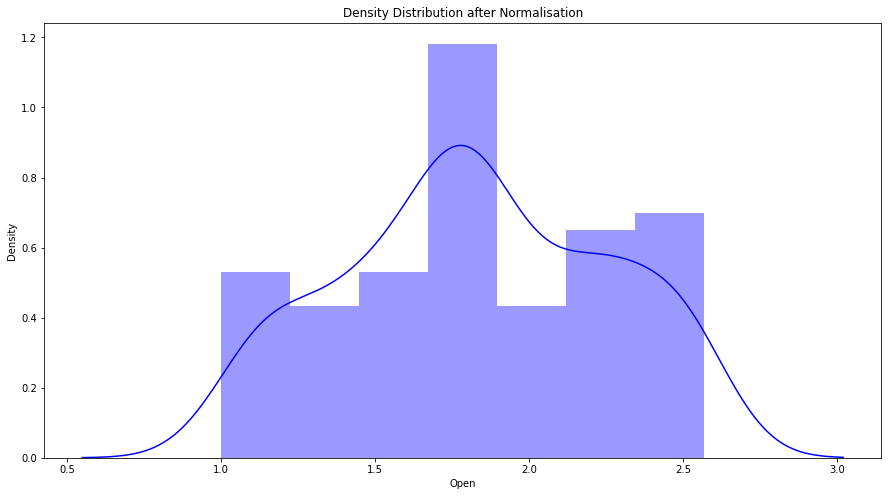

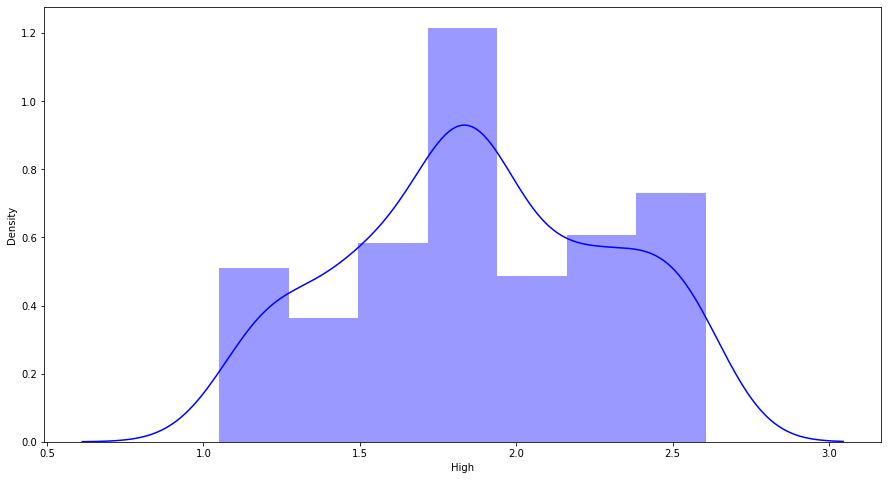

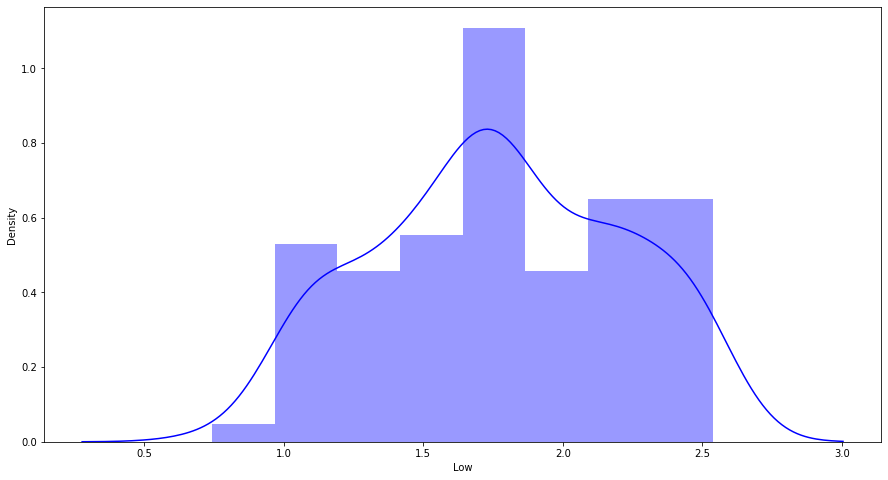

In [ ]:
#Density Distribution Plot for Independent Variables after Normalisation

plt.figure(figsize=(15,8))
plt.title('Density Distribution after Normalisation')
sns.distplot(np.log10(dataset['Open']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['High']), color='blue')

plt.figure(figsize=(15,8))
sns.distplot(np.log10(dataset['Low']), color='blue')



*   **After the log transformation we can see that the dataset is very much balanced and is close to a normal distribution**



# **FINDING CORRELATION BETWEEN VARIABLES**

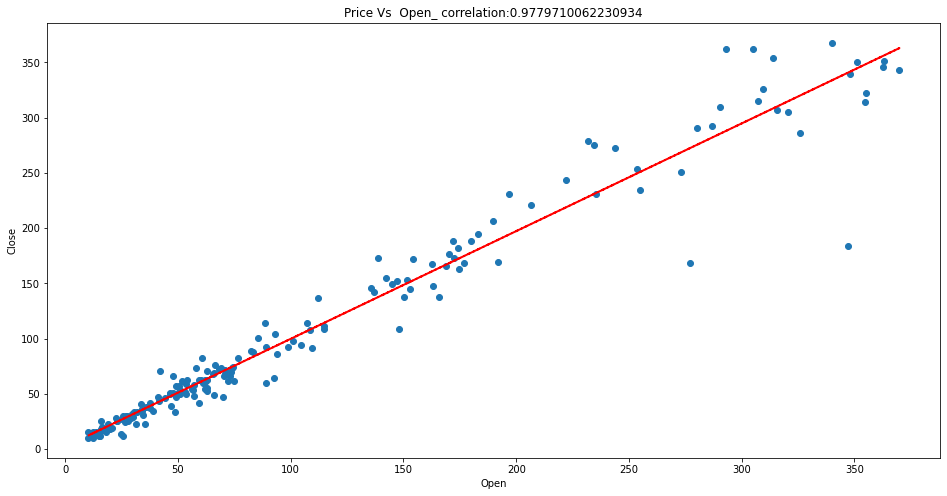

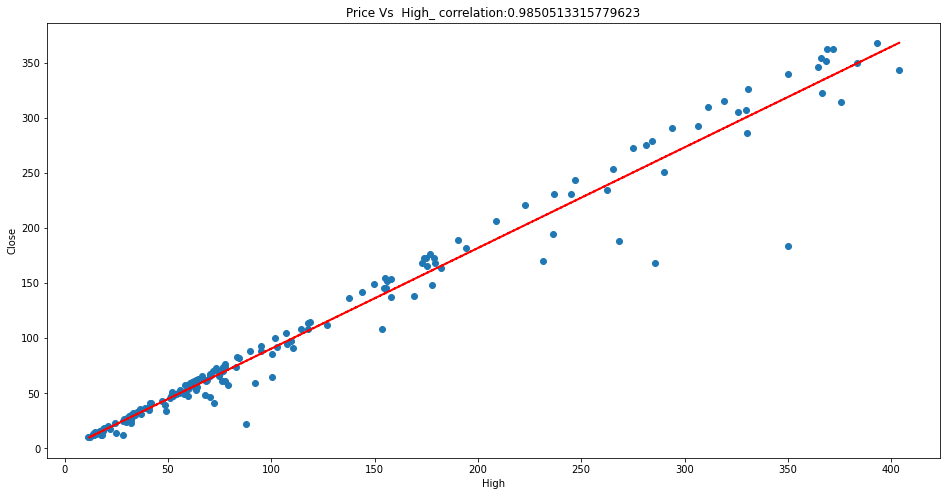

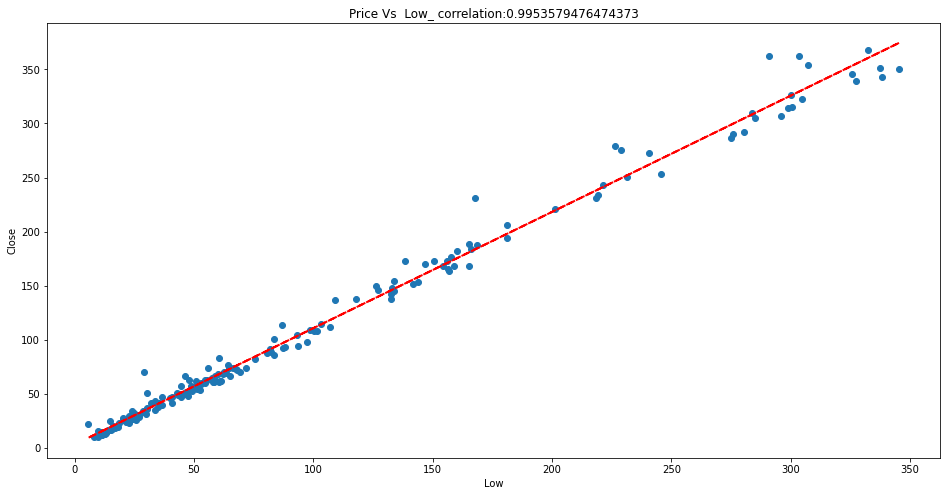

In [20]:
#finding the correlation between the Variables using regression line
for col in numerical_col[:-1]:
  fig = plt.figure(figsize = (16,8))
  ax = fig.gca()
  features = dataset[col]
  label = dataset['Close']
  correlation = features.corr(label)
  plt.scatter(x = features,y = label)
  plt.xlabel(col)
  plt.ylabel('Close')
  plt.title('Price Vs  ' + col + '_ correlation:' + str(correlation))
  z = np.polyfit(dataset[col],dataset['Close'],1)
  y_hat = np.poly1d(z)(dataset[col])
  plt.plot(dataset[col] , y_hat, "r--",lw = 2)
plt.show()

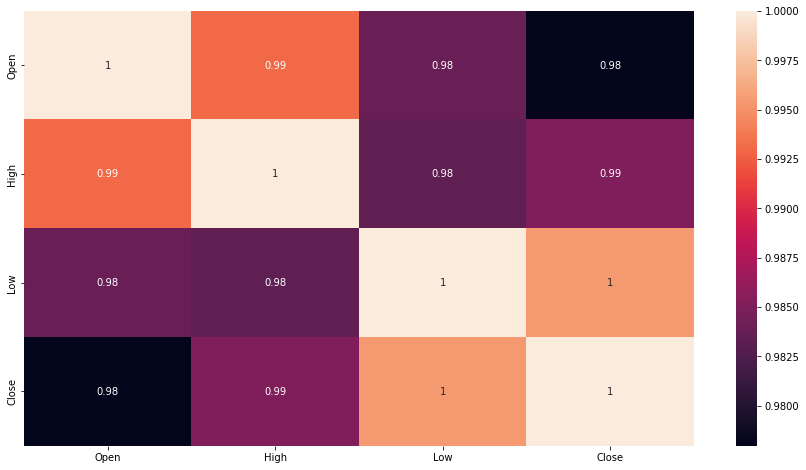

In [ ]:
# Correlation Between the Variables using heatmap
corr = dataset.corr()
plt.figure(figsize = (15,8))
sns.heatmap(abs(corr),annot = True)

* **We can see that all the columns are highly correlated to each other and all columns are effected by multicollinearity in this dataset**

# LET'S CHECK THE MULTICOLLINEARITY AND REMOVE IT BY CREATING ANOTHER COLUMN

In [21]:
# As we can check that the independent variables are all highly correlated to the dependent variable so lets check for multicollinearity 
from statsmodels.stats.outliers_influence import variance_inflation_factor

def cal_vif(X):
  '''This function will calculate the VIF of each column'''
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values,i) for i in range(X.shape[1])]

  return(vif)

In [22]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,167.057523
2,Low,71.574137


In [24]:
# Checking the difference between the high and the low values of each row 
dataset['Difference'] = dataset['High'] - dataset['Low']

In [25]:
dataset.head()

,Date,Open,High,Low,Close,Difference
0,2005-07-01,13.00,14.00,11.25,12.46,2.75
1,2005-08-01,12.58,14.88,12.55,13.42,2.33
2,2005-09-01,13.48,14.87,12.27,13.30,2.60
3,2005-10-01,13.20,14.47,12.40,12.99,2.07
4,2005-11-01,13.35,13.88,12.88,13.41,1.00


In [26]:
# Now lets recheck the VIF 
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close','Date']]])

,variables,VIF
0,Open,175.185704
1,High,inf
2,Low,inf
3,Difference,inf


In [27]:
cal_vif(dataset[[i for i in dataset.describe().columns if i not in ['Close','Date','High','Low']]])

,variables,VIF
0,Open,3.249535
1,Difference,3.249535


# **MODELLING**

In [30]:
# Now we are willing to create a dataset X and Y and divide them into training and testing sets
# Also before doing that we will drop multicollinear columns and do normalization

# First create a dataset of independent variables 
x = dataset.drop(columns=['Close','Date','High', 'Low']).apply(zscore)
y = np.log10(dataset['Close'])

**TRAIN TEST SPLIT**

In [31]:
# Creating Testing and Training Datasets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.20,random_state = 1)

In [32]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(148, 2)
(37, 2)
(148,)
(37,)


# **4 models of Regression**



1. **Linear Regression :-Linear regression is one of the easiest and most popular Machine Learning algorithms. It is a statistical method that is used for predictive analysis.Linear regression algorithm shows a linear relationship between a dependent (y) and one or more independent (y) variables, hence called as linear regression.**

2. **Lasso :-Lasso regression is a type of linear regression that uses shrinkage. Shrinkage is where data values are shrunk towards a central point, like the mean. The lasso procedure encourages simple, sparse models (i.e. models with fewer parameters).**

3. **Ridge :-Ridge regression is a model tuning method that is used to analyse any data that suffers from multicollinearity. This method performs L2 regularization. When the issue of multicollinearity occurs, least-squares are unbiased, and variances are large, this results in predicted values to be far away from the actual values.**

4. **Elastic Net :-Elastic net is a popular type of regularized linear regression that combines two popular penalties, specifically the L1 and L2 penalty functions. ... Elastic Net is an extension of linear regression that adds regularization penalties to the loss function during training.**

> **Cross-validation :-It is a resampling procedure used to evaluate machine learning models on a limited data sample. Basically Cross Validation is a technique using which Model is evaluated on the dataset on which it is not trained i.e. it can be a test data or can be another set as per availability or feasibility.**




# **LINEAR REGRESSION**

In [33]:
#Creating the Linear Regression Object and Training the model
regressor = LinearRegression()
reg_model = regressor.fit(x_train,y_train)

In [34]:
#Regression score
regressor.score(x_train,y_train)

0.7994811132120048

In [35]:
#finding the regression coeffiecients
regressor.coef_

array([ 0.39975358, -0.02965154])

In [36]:
#finding the regression intercept
regressor.intercept_

1.8308012505026272

**PREDICTION of Linear Regression**

In [37]:
#Prediction of Linear Regression
y_test_pred = regressor.predict(x_test)
y_train_pred = regressor.predict(x_train)

#**EVALUATION METRICS for Linear Regression**

In [38]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_test_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE :",mean_absolute_error(y_test, y_test_pred))
print("R2 :",r2_score(y_test, y_test_pred))

MSE : 0.03582513801718339
RMSE : 0.18927529690158565
MAE : 0.15913076829828957
R2 : 0.7987350358121631


In [39]:
# Train Performance
print("MSE :",mean_squared_error(y_train, y_train_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_train, y_train_pred)))
print("MAE :",mean_absolute_error(y_train, y_train_pred))
print("R2 :",r2_score(y_train, y_train_pred))

MSE : 0.0364170666073113
RMSE : 0.19083256170609697
MAE : 0.1608665912789462
R2 : 0.7994811132120048


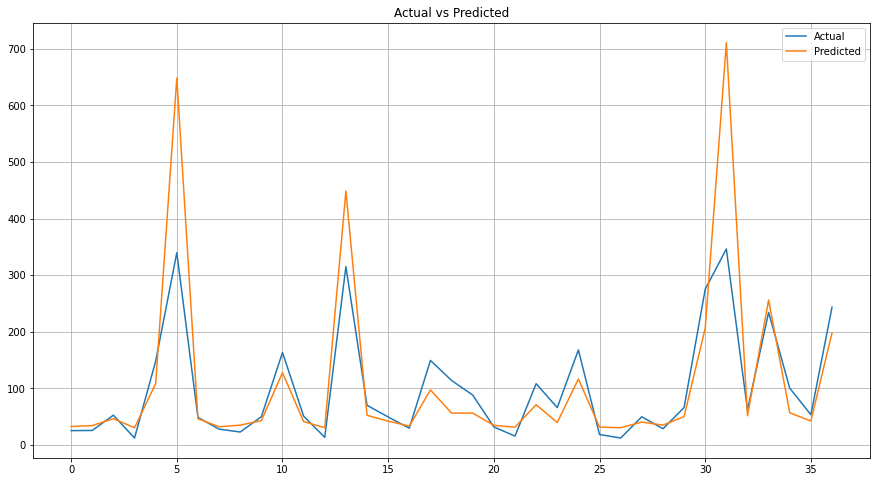

In [40]:
# Linear Regression Plotting
plt.figure(figsize=(15,8))
plt.title('Actual vs Predicted')
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_test_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#**Lasso Regression**

In [41]:
#importing lasso regression
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.005,max_iter=3000)
lasso_model = lasso.fit(x_train,y_train)

In [42]:
#checking the Regression score
lasso.score(x_train,y_train)

0.7986719355598494

**Prediction of Lasso Regression**

In [43]:
#Prediction
y_lasso_pred = lasso.predict(x_test)

**Evaluation Matrices**

In [44]:
# Test Performance
print("MSE :",mean_squared_error(y_test,y_lasso_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_lasso_pred)))
print("MAE :",mean_absolute_error(y_test, y_lasso_pred))
print("R2 :",r2_score(y_test, y_lasso_pred))

MSE : 0.03510879500253321
RMSE : 0.18737341060709017
MAE : 0.15781589897066262
R2 : 0.8027594376475621


**Lasso Predication** 

**Predicted vs Actual**

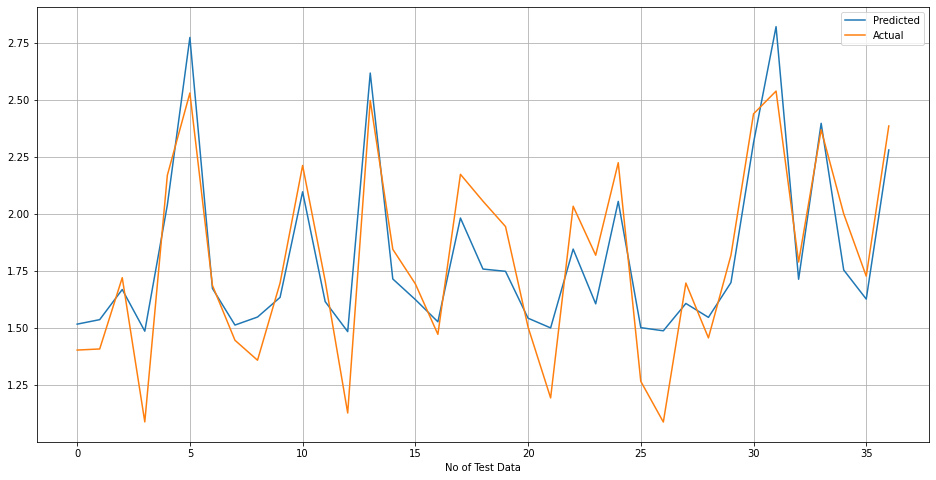

In [45]:
#Plot for predicted vs actual
plt.figure(figsize=(16,8))
plt.plot(y_lasso_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Cross Validification**

In [46]:
#importing GridSearchCV for finding the optimal parameter values from a given set of parameters in a grid.
from sklearn.model_selection import GridSearchCV

In [47]:
# Hyper-parameter Tuning

lasso_cv = Lasso()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100,0.0014]}
lasso_model = GridSearchCV(lasso_cv, parameters,scoring = 'neg_mean_squared_error',cv = 3)

In [48]:
#Training the model
lasso_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100, 0.0014]},
             scoring='neg_mean_squared_error')

In [49]:
#Finding the alpha value and negative mean squared error
print("The best fit alpha value is found out to be :" ,lasso_model.best_params_)
print("\nUsing ",lasso_model.best_params_, " the negative mean squared error is: ", lasso_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -0.03746992741967367


**Prediction of Lasso Regression**

In [50]:
#Prediction
y_pred_lasso = lasso_model.predict(x_test)

**Evaluation Matrices**

In [51]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_lasso))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_lasso)))
print("MAE :",mean_absolute_error(y_test, y_pred_lasso))
print("R2 :",r2_score(y_test, y_pred_lasso))

MSE : 0.03463054983293802
RMSE : 0.1860928527185771
MAE : 0.1565026230442496
R2 : 0.8054462101838022


**Lasso Predication** 

**Predicted vs Actual After Validification**

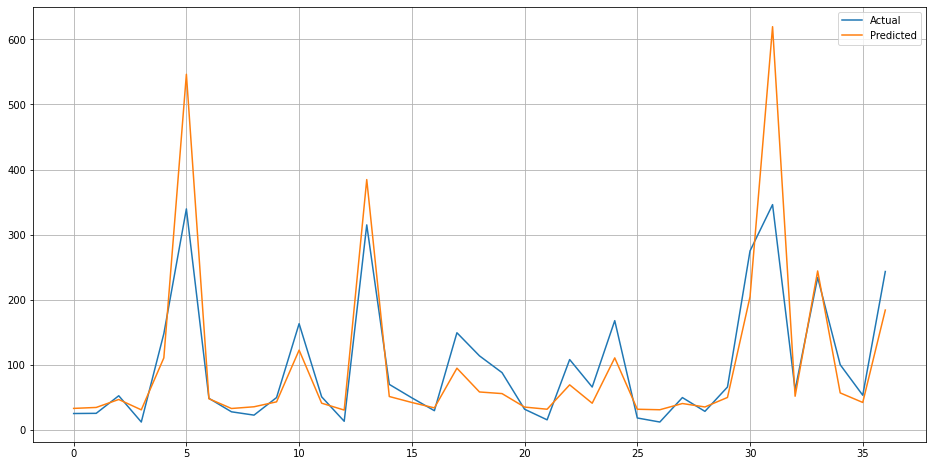

In [52]:
# Lasso Regression plotting
plt.figure(figsize=(16,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_pred_lasso))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

#**Ridge Linear Regression**

In [53]:
#importing ridge
from sklearn.linear_model import Ridge

In [54]:
#training the model
ridge  = Ridge(alpha=0.1)
ridge.fit(x_train,y_train)

Ridge(alpha=0.1)

In [55]:
#ridge regression score
ridge.score(x_train, y_train)

0.7994802933405704

**Prediction of Ridge Regression**

In [56]:
#Prediction
y_ridge_pred = ridge.predict(x_test)

**Evaluation Metrics**

In [57]:
# Test performance

print("MSE :",mean_squared_error(y_test, y_ridge_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_ridge_pred)))
print("MAE :",mean_absolute_error(y_test, y_ridge_pred))
print("R2 :",r2_score(y_test, y_ridge_pred))

MSE : 0.03580528104118937
RMSE : 0.1892228343546026
MAE : 0.15909913544271795
R2 : 0.798846591936815


**RIDGE LINEAR Prediction** 

**Predicted vs Actual**

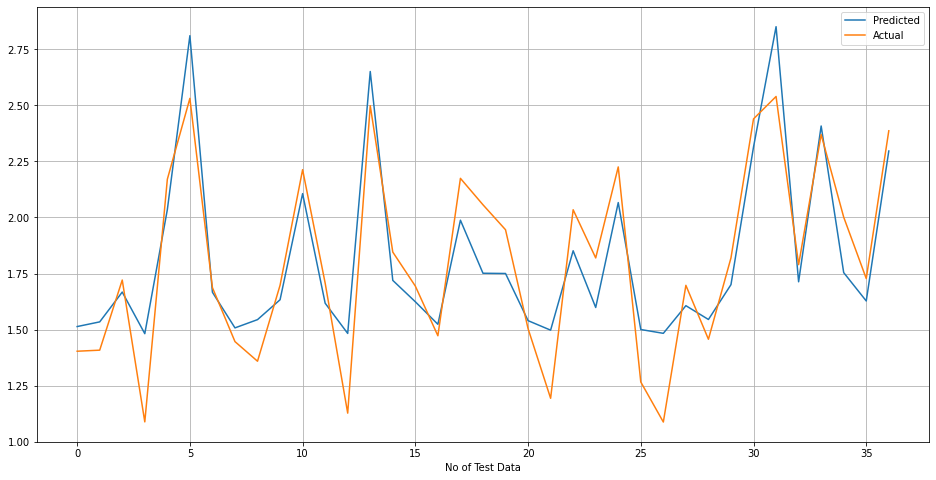

In [58]:
#Ridge regression plot
plt.figure(figsize=(16,8))
plt.plot(y_ridge_pred)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

**Cross Validification of Ridge**

In [59]:
# Hyper-parameter Tuning
ridge_cv = Ridge()
parameters = {'alpha':[1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_model = GridSearchCV(ridge_cv,parameters,scoring='neg_mean_squared_error',cv=3)
ridge_model.fit(x_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='neg_mean_squared_error')

In [60]:
print("The best fit alpha value is found out to be :" ,ridge_model.best_params_)
print("\nUsing ",ridge_model.best_params_, " the negative mean squared error is: ", ridge_model.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -0.03801659853539616


**PREDICTION FOR CROSS VALIDIFICATION**

In [61]:
# Model Predication
y_pred_ridge  = ridge_model.predict(x_test)

In [62]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_pred_ridge))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_pred_ridge)))
print("MAE :",mean_absolute_error(y_test, y_pred_ridge))
print("R2 :",r2_score(y_test, y_pred_ridge))

MSE : 0.035825138017183344
RMSE : 0.1892752969015855
MAE : 0.15913076829828948
R2 : 0.7987350358121633


**RIDGE LINEAR PREDICTION**
 
**ACTUAL VS PREDICTED AFTER VALIDIFICATION**

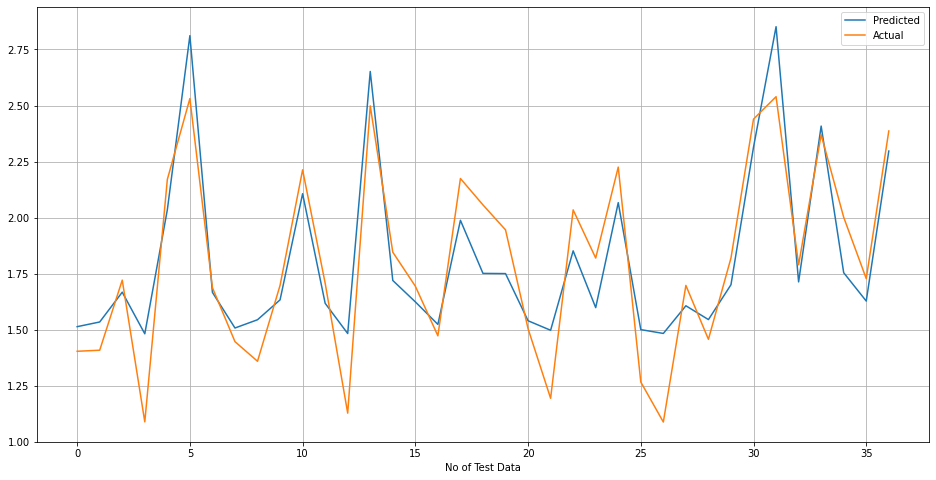

In [63]:
#Plot for actual vs predicted after cross validification
plt.figure(figsize=(16,8))
plt.plot(y_pred_ridge)
plt.plot(np.array(y_test))
plt.legend(["Predicted","Actual"])
plt.xlabel('No of Test Data')
plt.grid()
plt.show()

# **ELASTIC NET LINEAR REGRESSION**

In [64]:
#import elastic net regression model
from sklearn.linear_model import ElasticNet

In [65]:
#train the model
elastic = ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(x_train,y_train)

ElasticNet(alpha=0.1)

**PREDICTION**

In [66]:
#Finding the prediction
y_elastic_pred = elastic.predict(x_test)

**EVALUATION METRICS**

In [67]:
# Test Performance
print("MSE :",mean_squared_error(y_test, y_elastic_pred))
print("RMSE :",math.sqrt(mean_squared_error(y_test, y_elastic_pred)))
print("MAE :",mean_absolute_error(y_test, y_elastic_pred))
print("R2 :",r2_score(y_test, y_elastic_pred))

MSE : 0.03981977649758226
RMSE : 0.19954893258943346
MAE : 0.16283128019754659
R2 : 0.7762932305547707


**Elastic Net Predication** 

**Predicted vs Actual (After Validification)**

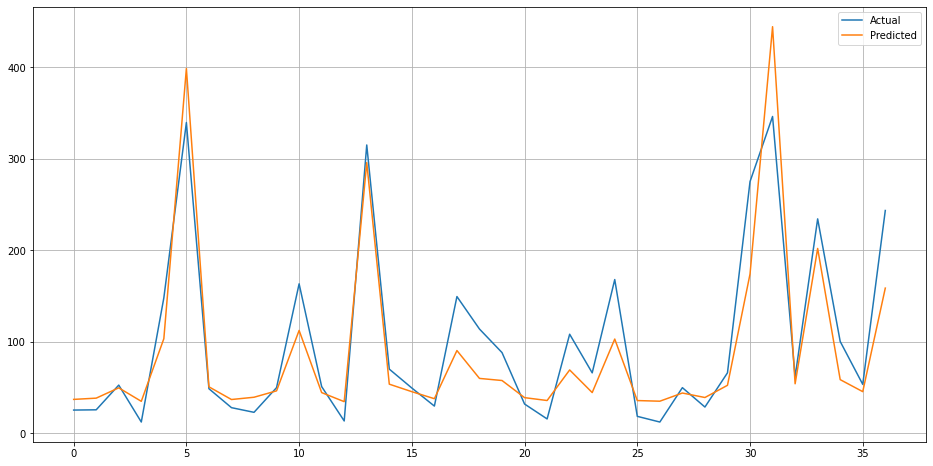

In [68]:
#Plot for Elastic Net Linear Regression
plt.figure(figsize=(16,8))
plt.plot(10**(np.array(y_test)))
plt.plot(10**(y_elastic_pred))
plt.legend(['Actual','Predicted'])
plt.grid()
plt.show()

In [69]:
# Function to run all model 
def mape(actual, pred): 
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100
def score_model(x_train,y_train,x_test,y_test):
    df_columns=[]
    df=pd.DataFrame(columns=df_columns) # Creating dataframe to store the train and test metrics for each of the models
    
    i=0
    
    #Reading model one by one
    for model in models:
        model.fit(x_train,y_train)
        
        y_pred_train = model.predict(x_train)
        y_pred_test = model.predict(x_test)

        #Computing evaluation metrics
        train_accuracy=model.score(x_train,y_train)
        test_accuracy=model.score(x_test,y_test)
        
        MAE=metrics.mean_absolute_error(y_test, y_pred_test)
        MSE=metrics.mean_squared_error(y_test, y_pred_test)
        RMSE=math.sqrt(MSE)
        # MAPE=mape(y_test, y_pred_test)
        Rsquare=metrics.r2_score(y_test, y_pred_test)
        
        
        #Inserting in dataframe
        df.loc[i,"Model_Name"]=model.__class__.__name__
        df.loc[i,"MAE"]=round(MAE,3)
        df.loc[i,"MSE"]=round(MSE,3)
        df.loc[i,"RMSE"]=round(RMSE,3)
        # df.loc[i,"MAPE"]=round(MAPE,3)
        df.loc[i,"Rsquare"]=round(Rsquare,3)
        
        i+=1
    
    #Sorting values by accuracy
    df.sort_values(by=['Rsquare'],ascending=False,inplace=True)
    
    return df

In [70]:
models = [regressor,lasso,ridge,elastic]

In [71]:
#Testing performance
report=score_model(x_train,y_train,x_test,y_test)
report

,Model_Name,MAE,MSE,RMSE,Rsquare
1,Lasso,0.158,0.035,0.187,0.803
0,LinearRegression,0.159,0.036,0.189,0.799
2,Ridge,0.159,0.036,0.189,0.799
3,ElasticNet,0.163,0.040,0.200,0.776


# **CONCLUSION**

> **AT FIRST WE DID DATA WRANGLING FOLLOWED BY DATA CLEANING AND THEN WE DID EXPLORATORY DATA ANALYSIS.**


*   STOCK CLOSE PRICE DECREASED AFTER YEAR 2018 AND IT IS BECAUSE THE RANA KAPOOR CASE AND HITTED THE PRICE VERY BADLY.
*   THE STOCK PRICE FELL DOWN IN 2018 AND IT WAS NOT A GOOD CHOICE FOR THE INVESTORS TO INVEST IN THIS STOCK.
*   FROM HEATMAP WE CAN CONCLUDE THAT ALL THE VARIABLES ARE HIGHLY CORRELATED WITH EACH OTHER.
*   FROM THE BARPLOTS WE CAN SEE THAT ALL ARE RIGHT SKEWED.

> **WE IMPLEMENTED LINEAR REGRESSION AND ACCURACY OF OUR MODEL IS 79.9%**

> **AFTER THAT WE VISUALIZE THE PERFORMANCE OF OUR MODEL AND IT IS NEARLY FIT MODEL FOR OUR DATASET.**





